# <center>Product Review Data Analysis and Processing</center>

### <center>Balraj Singh Bains &nbsp;&nbsp;&nbsp;&nbsp; Brandon Chua Shao Jie &nbsp;&nbsp;&nbsp;&nbsp; Ron Kow Kheng Hui &nbsp;&nbsp;&nbsp;&nbsp; Samuel Samsudin Ng</center> ###

## 3.2 Dataset Analysis
## 3.2.1 Popular Products and Frequent Reviewers ###

In [1]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import sent_tokenize   # for sentence tokenization
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# install nltk packages
nltk_downloader = nltk.downloader.Downloader()
if not nltk_downloader.is_installed('punkt'):
    nltk_downloader.download('punkt')
if not nltk_downloader.is_installed('averaged_perceptron_tagger'):
    nltk_downloader.download('averaged_perceptron_tagger')

plt.close('all')

**Open the json file and write the data to a list. Then convert the list to a pandas DataFrame.** 

In [2]:
# Create a list of all records

data_dir = './'
data_file = 'CellPhoneReview.json'
all_reviews = []

with open(data_dir + data_file) as json_file:
    for j in json_file:
        x = json.loads(j)
        all_reviews.append(x)
        
# Convert list to DataFrame
df_all_reviews = pd.DataFrame(all_reviews)

In [3]:
print('Number of reviews = ',len(df_all_reviews),'\n')

# Inspect the first two rows
df_all_reviews.head(2)

Number of reviews =  190919 



,reviewerID,asin,reviewText,overall,summary,unixReviewTime,reviewTime
0,ASY55RVNIL0UD,120401325X,These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014"
1,A2TMXE2AFO7ONB,120401325X,These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014"


In [4]:
df_date = df_all_reviews[['reviewTime']]
df_date.head(2)

,reviewTime
0,"01 14, 2014"
1,"06 26, 2014"


In [5]:
# Check range of years

date_year = []
for i, row in df_date.iterrows():
    date_token = word_tokenize(row['reviewTime'])
    for t in date_token:
        if t != ',' and int(t) > 31:
            date_year.append(t)

print(len(date_year))

190919


In [6]:
# Convert str in date_year to int
date_year = list(map(int, date_year))

# Check range of years
print(min(date_year))
print(max(date_year))

2001
2014


In [7]:
# Check number of reviews per year

for year in range(2001,2015):
    print(year, ': ',date_year.count(year))

2001 :  1
2002 :  1
2003 :  2
2004 :  44
2005 :  129
2006 :  240
2007 :  389
2008 :  676
2009 :  1304
2010 :  3414
2011 :  9516
2012 :  29612
2013 :  91261
2014 :  54330


### The DataFrame **df_all_reviews** will be used in all sub-sections:   
**3.2.1** Popular Products and Frequent Reviewers   
**3.2.2** Sentence Segmentation   
**3.2.3** Tokenization and Stemming    
**3.2.4** POS Tagging  
**Each sub-section can be run independently.**

**Explore the data to determine:   
(1) Number of unique products,   
(2) Number of unique reviewers,  
(3) Distribution of number of reviews (by number of products),  
(4) Distribution of number of reviews (by number of reviewers)**

In [8]:
# (1) Create 2-column DataFrames: asin num_reviews
# For plotting review distribution histogram later

df_product_numreviews = df_all_reviews.asin.value_counts().reset_index()
df_product_numreviews.columns = ['asin', 'num_reviews']

print('Number of unique products = ',len(df_product_numreviews.asin),'\n')
df_product_numreviews.head(2)

Number of unique products =  10420 



,asin,num_reviews
0,B005SUHPO6,836
1,B0042FV2SI,690


In [9]:
# (2) Create 2-column DataFrames from (1) for sanity check: num_reviews num_products

df_numreviews_numproducts = df_product_numreviews.num_reviews.value_counts().reset_index()
df_numreviews_numproducts.columns = ['num_reviews', 'num_products']

df_numreviews_numproducts

,num_reviews,num_products
0,5,1754
1,6,1235
2,7,1023
3,8,716
4,9,609
...,...,...
214,196,1
215,162,1
216,194,1
217,250,1


In [10]:
# (3) Create 2 column DataFrames: reviewerID num_reviews
# For plotting review distribution histogram later

df_reviewer_numreviews = df_all_reviews.reviewerID.value_counts().reset_index()
df_reviewer_numreviews.columns = ['reviewerID', 'num_reviews']

print('Number of unique reviewers = ',len(df_reviewer_numreviews.reviewerID),'\n')
df_reviewer_numreviews.head(2)

Number of unique reviewers =  27874 



,reviewerID,num_reviews
0,A2NYK9KWFMJV4Y,152
1,A22CW0ZHY3NJH8,138


In [11]:
# (4) Create 2 column DataFrames from (3) for sanity check: num_reviews num_reviewers

df_numreviews_numreviewers = df_reviewer_numreviews.num_reviews.value_counts().reset_index()
df_numreviews_numreviewers.columns = ['num_reviews', 'num_reviewers']

df_numreviews_numreviewers

,num_reviews,num_reviewers
0,5,11497
1,6,5675
2,7,3314
3,8,1934
4,9,1197
...,...,...
74,56,1
75,87,1
76,71,1
77,102,1


### Plot 1 - NUMBER OF PRODUCTS (y) against NUMBER OF REVIEWS (x)

In [12]:
# Just need a single column (num_reviews) to plot the distribution using a histogram 
# Remove the first columns in (2) and (4)

df_product_numreviews = df_product_numreviews[['num_reviews']]
df_reviewer_numreviews = df_reviewer_numreviews[['num_reviews']]

# SUMMARY STATISTICS
print('SUMMARY STATISTICS\n')
print('Max number of reviews (product) = ',max(df_product_numreviews['num_reviews']))
print('Min number of reviews (product) = ',min(df_product_numreviews['num_reviews']))
print('Mean number of reviews (product) = ',df_product_numreviews['num_reviews'].mean())
print('Median number of reviews (product) = ',df_product_numreviews['num_reviews'].median(),'\n')

print('Max number of reviews (reviewer) = ',max(df_reviewer_numreviews['num_reviews']))
print('Min number of reviews (reviewer) = ',min(df_reviewer_numreviews['num_reviews']))
print('Mean number of reviews (reviewer) = ',df_reviewer_numreviews['num_reviews'].mean())
print('Median number of reviews (reviewer) = ',df_reviewer_numreviews['num_reviews'].median())

SUMMARY STATISTICS

Max number of reviews (product) =  836
Min number of reviews (product) =  1
Mean number of reviews (product) =  18.32236084452975
Median number of reviews (product) =  9.0 

Max number of reviews (reviewer) =  152
Min number of reviews (reviewer) =  1
Mean number of reviews (reviewer) =  6.849357824495946
Median number of reviews (reviewer) =  6.0


**Plot histograms to show the reviews distribution by number of products:  
(1) Linear scale      
(2) log scale**

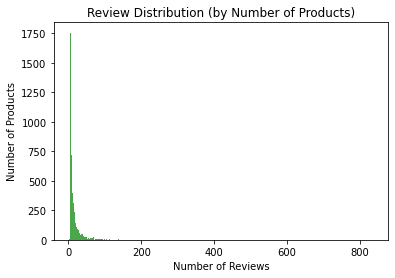

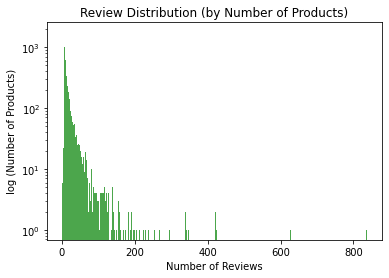

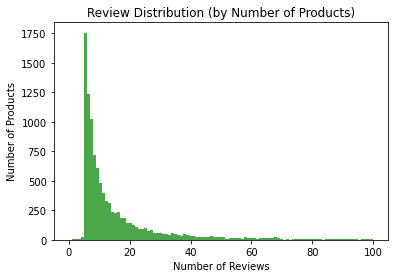

In [13]:
# Plot histogram for the range of num_reviews

# LINEAR SCALE
p1 = df_product_numreviews.plot.hist(alpha = 0.7, bins=836, color='g')
p1.set_xlabel('Number of Reviews')
p1.set_ylabel('Number of Products')
p1.set_title('Review Distribution (by Number of Products)')
p1.get_legend().remove()

# LOG SCALE
p2 = df_product_numreviews.plot.hist(alpha = 0.7, bins=836, log=True, color='g')
p2.set_xlabel('Number of Reviews')
p2.set_ylabel('log (Number of Products)')
p2.set_title('Review Distribution (by Number of Products)')
p2.get_legend().remove()

# LINEAR SCALE
p3 = df_product_numreviews.plot.hist(range = (0,100), alpha = 0.7, bins=101, color='g')
p3.set_xlabel('Number of Reviews')
p3.set_ylabel('Number of Products')
p3.set_title('Review Distribution (by Number of Products)')
p3.get_legend().remove()

plt.show()

### Plot 2 - NUMBER OF REVIEWERS (y) against NUMBER OF REVIEWS (x) 

**Plot histograms to show the reviews distribution by number of reviewers:  
(1) Linear scale     
(2) log scale**

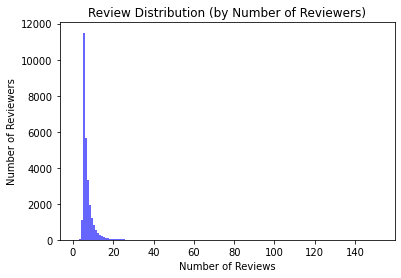

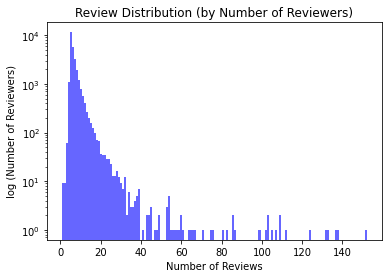

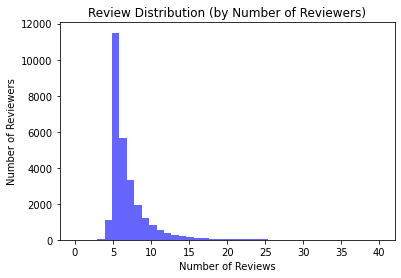

In [14]:
# Plot histogram for the range of num_reviews

# LINEAR SCALE
r1 = df_reviewer_numreviews.plot.hist(alpha = 0.6, bins=152, color='b')
r1.set_xlabel('Number of Reviews')
r1.set_ylabel('Number of Reviewers')
r1.set_title('Review Distribution (by Number of Reviewers)')
r1.get_legend().remove()

# LOG SCALE
r2 = df_reviewer_numreviews.plot.hist(alpha = 0.6, bins=152, log=True, color='b')
r2.set_xlabel('Number of Reviews')
r2.set_ylabel('log (Number of Reviewers)')
r2.set_title('Review Distribution (by Number of Reviewers)')
r2.get_legend().remove()

# LINEAR SCALE
r3 = df_reviewer_numreviews.plot.hist(range = (0,40), alpha = 0.6, bins=41, color='b')
r3.set_xlabel('Number of Reviews')
r3.set_ylabel('Number of Reviewers')
r3.set_title('Review Distribution (by Number of Reviewers)')
r3.get_legend().remove()

plt.show()

### Plot 3 - One plot for each group of reviewers: most active, active, average, not very active, not active.   
**Set criteria for reviewer activity levels (based on average number of reviews over 10 years 2005 to 2014 (2001 to 2004 not counted)**   
**MOST ACTIVE:**     more than 6 reviews/year = 61 to 152 total reviews      
**ACTIVE:**          3 to 6 reviews/year =  31 to 60 total reviews   
**AVERAGE:**         2 to 3 reviews/year = 21 to 30 total reviews    
**NOT VERY ACTIVE:** 1 to 2 reviews/year = 10 to 20 total reviews           
**NOT ACTIVE:**      less than 1 review/year = 1 to 9 total reviews  

**Plot the reviews distribution for each group of reviewers.  
For 'Not Active' reviewers: plot (1) linear scale (2) log scale**

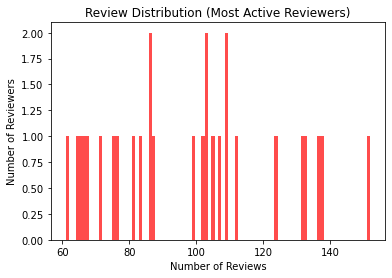

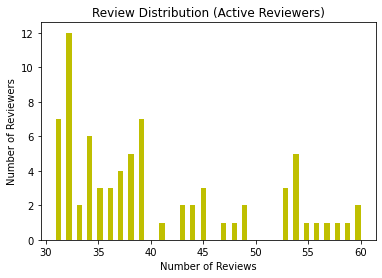

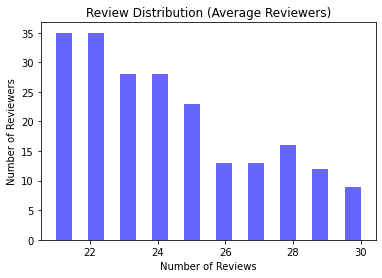

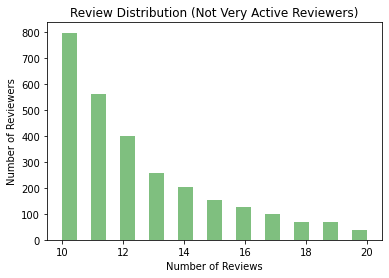

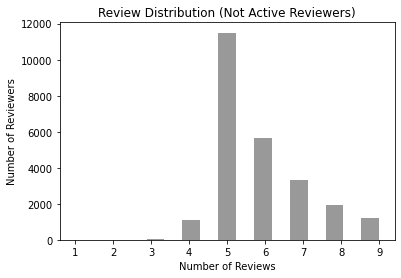

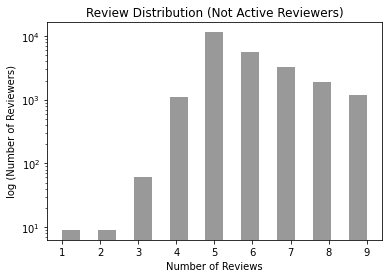

In [15]:
most = df_reviewer_numreviews.plot.hist(range=[61,152], alpha = 0.7, bins=92, color='r')
most.set_xlabel('Number of Reviews')
most.set_ylabel('Number of Reviewers')
most.set_title('Review Distribution (Most Active Reviewers)')
most.get_legend().remove()

above = df_reviewer_numreviews.plot.hist(range=[31,60], alpha = 1.0, bins=59, color='y')
above.set_xlabel('Number of Reviews')
above.set_ylabel('Number of Reviewers')
above.set_title('Review Distribution (Active Reviewers)')
above.get_legend().remove()

average = df_reviewer_numreviews.plot.hist(range=[21,30], alpha = 0.6, bins=19, color='b')
average.set_xlabel('Number of Reviews')
average.set_ylabel('Number of Reviewers')
average.set_title('Review Distribution (Average Reviewers)')
average.get_legend().remove()

below = df_reviewer_numreviews.plot.hist(range=[10,20], alpha = 0.5, bins=21, color='g')
below.set_xlabel('Number of Reviews')
below.set_ylabel('Number of Reviewers')
below.set_title('Review Distribution (Not Very Active Reviewers)')
below.get_legend().remove()

# LINEAR SCALE
least = df_reviewer_numreviews.plot.hist(range=[1,9], alpha = 0.8, bins=17, color='grey')
least.set_xlabel('Number of Reviews')
least.set_ylabel('Number of Reviewers')
least.set_title('Review Distribution (Not Active Reviewers)')
least.get_legend().remove()

# LOG SCALE
least = df_reviewer_numreviews.plot.hist(range=[1,9], alpha = 0.8, bins=17, log = True, color='grey')
least.set_xlabel('Number of Reviews')
least.set_ylabel('log (Number of Reviewers)')
least.set_title('Review Distribution (Not Active Reviewers)')
least.get_legend().remove()

plt.show()

## Plot 4 - For each group of reviewers, plot the rating (1.0 to 5.0) distribution.

**Create a DataFrame with these columns - reviewerID, overall, num_reviews.**

In [16]:
# (5) Re-create 2-column DataFrames previously created in (3): reviewerID num_reviews

df_reviewer_numreviews = df_all_reviews.reviewerID.value_counts().reset_index()
df_reviewer_numreviews.columns = ['reviewerID', 'num_reviews']
df_reviewer_numreviews.head(2)

,reviewerID,num_reviews
0,A2NYK9KWFMJV4Y,152
1,A22CW0ZHY3NJH8,138


In [17]:
# (6) Create 2-column DataFrame: reviewerID overall

df_reviewer_rating = df_all_reviews[['reviewerID','overall']]
df_reviewer_rating.head(2)

,reviewerID,overall
0,ASY55RVNIL0UD,5.0
1,A2TMXE2AFO7ONB,5.0


In [18]:
# (7) Merge (5) and (6) to get 3-column DataFrame: reviewerID overall num_reviews

df_reviewer_rating_numreviews = pd.merge(df_reviewer_rating, df_reviewer_numreviews, on = 'reviewerID')
df_reviewer_rating_numreviews.head(2)

,reviewerID,overall,num_reviews
0,ASY55RVNIL0UD,5.0,5
1,ASY55RVNIL0UD,5.0,5


**CRITERIA**   
**MOST ACTIVE:**     more than 6 reviews/year = 61 to 152 total reviews      
**ACTIVE:**          3 to 6 reviews/year =  31 to 60 total reviews   
**AVERAGE:**         2 to 3 reviews/year = 21 to 30 total reviews    
**NOT VERY ACTIVE:** 1 to 2 reviews/year = 10 to 20 total reviews           
**NOT ACTIVE:**      less than 1 review/year = 1 to 9 total reviews  

**Partition the DataFrame into the five groups of reviewers.**

In [19]:
# Partition (7) into 5 DataFrames, one for each group of reviewers (most, above, average, below, least) 

df = df_reviewer_rating_numreviews

df_rating_most = df.loc[(df['num_reviews']>=61) & (df['num_reviews']<=152)]
df_rating_above = df.loc[(df['num_reviews']>=31) & (df['num_reviews']<=60)]
df_rating_average = df.loc[(df['num_reviews']>=21) & (df['num_reviews']<=30)]
df_rating_below = df.loc[(df['num_reviews']>=10) & (df['num_reviews']<=20)]
df_rating_least = df.loc[(df['num_reviews']>=1) & (df['num_reviews']<=9)]

print('NUMBER OF REVIEWS \n')
print('Very active: ', len(df_rating_most))
print('Active: ', len(df_rating_above))
print('Average: ', len(df_rating_average))
print('Not very active: ', len(df_rating_below))
print('Not active: ', len(df_rating_least)) 

NUMBER OF REVIEWS 

Very active:  2733
Active:  3072
Average:  5151
Not very active:  34420
Not active:  145543


**Create the ratings distribution for each group of reviewers.**

In [20]:
# For each group of reviewers, create a 1-column DataFrame: overall

df_rating_most = df_rating_most[['overall']]
df_rating_above = df_rating_above[['overall']]
df_rating_average = df_rating_average[['overall']]
df_rating_below = df_rating_below[['overall']]
df_rating_least = df_rating_least[['overall']]

# Sanity check
print(df_rating_most.head(2))
print(df_rating_above.head(2))
print(df_rating_average.head(2))
print(df_rating_below.head(2))
print(df_rating_least.head(2))

      overall
1226      3.0
1227      4.0
      overall
1368      5.0
1369      5.0
     overall
251      5.0
252      1.0
    overall
18      5.0
19      3.0
   overall
0      5.0
1      5.0


In [21]:
# (8) For each DataFrame, create a DataFrame for number of reviews per rating 

df_rating_numreviews_most = df_rating_most.overall.value_counts().reset_index()
df_rating_numreviews_most.columns = ['rating', 'num_reviews']

df_rating_numreviews_above = df_rating_above.overall.value_counts().reset_index()
df_rating_numreviews_above.columns = ['rating', 'num_reviews']

df_rating_numreviews_average = df_rating_average.overall.value_counts().reset_index()
df_rating_numreviews_average.columns = ['rating', 'num_reviews']

df_rating_numreviews_below = df_rating_below.overall.value_counts().reset_index()
df_rating_numreviews_below.columns = ['rating', 'num_reviews']

df_rating_numreviews_least = df_rating_least.overall.value_counts().reset_index()
df_rating_numreviews_least.columns = ['rating', 'num_reviews']

print('RATINGS DISTRIBUTION \n')
print('Most Active')
print(df_rating_numreviews_most)
print('Active')
print(df_rating_numreviews_above)
print('Average')
print(df_rating_numreviews_average)
print('Not Very Active')
print(df_rating_numreviews_below)
print('Not Active')
print(df_rating_numreviews_least)

RATINGS DISTRIBUTION 

Most Active
   rating  num_reviews
0     5.0         2048
1     4.0          546
2     3.0          100
3     2.0           28
4     1.0           11
Active
   rating  num_reviews
0     5.0         1931
1     4.0          700
2     3.0          265
3     2.0          114
4     1.0           62
Average
   rating  num_reviews
0     5.0         2928
1     4.0         1171
2     3.0          571
3     2.0          260
4     1.0          221
Not Very Active
   rating  num_reviews
0     5.0        19272
1     4.0         7450
2     3.0         3860
3     1.0         2024
4     2.0         1814
Not Active
   rating  num_reviews
0     5.0        80394
1     4.0        29437
2     3.0        16279
3     1.0        10760
4     2.0         8673


**Use lists for easy plotting of bar plots.**

In [22]:
# First, convert the DataFrame column 'num_reviews' in (8) to Lists, sorted by ratings from 1.0 to 5.0
# To use pandas plot() 

rating_numreviews_most = df_rating_numreviews_most.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_above = df_rating_numreviews_above.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_average = df_rating_numreviews_average.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_below = df_rating_numreviews_below.sort_values(['rating'])['num_reviews'].tolist()
rating_numreviews_least = df_rating_numreviews_least.sort_values(['rating'])['num_reviews'].tolist()

# Sanity check
print(rating_numreviews_most)
print(rating_numreviews_above)
print(rating_numreviews_average)
print(rating_numreviews_below)
print(rating_numreviews_least)

[11, 28, 100, 546, 2048]
[62, 114, 265, 700, 1931]
[221, 260, 571, 1171, 2928]
[2024, 1814, 3860, 7450, 19272]
[10760, 8673, 16279, 29437, 80394]


**Plot the ratings distributions**

Text(0.5, 1.0, 'Rating Distribution (Most Active Reviewers)')

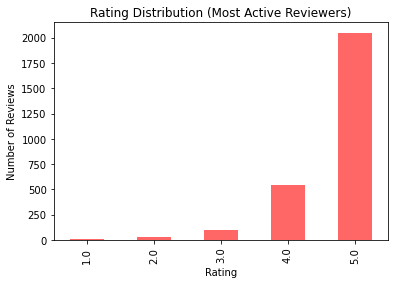

In [23]:
# Then convert the list to a Series, and plot the Series

# x-axis labels
rating = ['1.0', '2.0', '3.0', '4.0', '5.0']

most = pd.Series(rating_numreviews_most, rating).plot(kind='bar', alpha = 0.6,color='r')
most.set_xlabel('Rating')
most.set_ylabel('Number of Reviews')
most.set_title('Rating Distribution (Most Active Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Active Reviewers)')

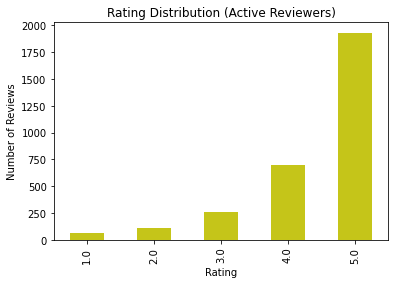

In [24]:
above = pd.Series(rating_numreviews_above, rating).plot(kind='bar', alpha = 0.9, color='y')
above.set_xlabel('Rating')
above.set_ylabel('Number of Reviews')
above.set_title('Rating Distribution (Active Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Average Reviewers)')

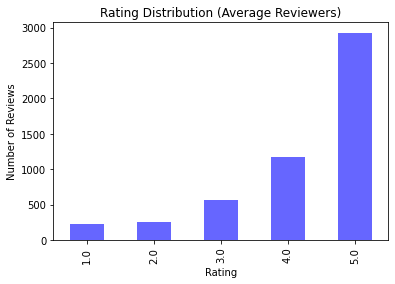

In [25]:
average = pd.Series(rating_numreviews_average, rating).plot(kind='bar', alpha = 0.6,color='b')
average.set_xlabel('Rating')
average.set_ylabel('Number of Reviews')
average.set_title('Rating Distribution (Average Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Not Very Active Reviewers)')

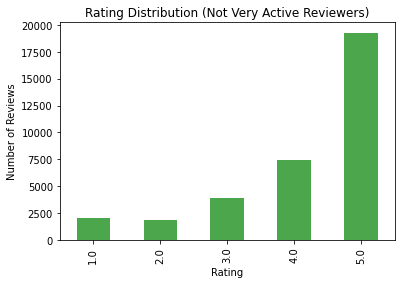

In [26]:
below = pd.Series(rating_numreviews_below, rating).plot(kind='bar', alpha = 0.7,color='g')
below.set_xlabel('Rating')
below.set_ylabel('Number of Reviews')
below.set_title('Rating Distribution (Not Very Active Reviewers)')

Text(0.5, 1.0, 'Rating Distribution (Not Active Reviewers)')

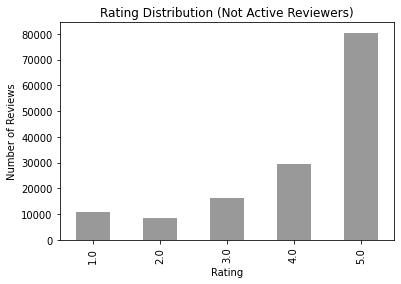

In [27]:
least = pd.Series(rating_numreviews_least, rating).plot(kind='bar', alpha = 0.8, color='grey')
least.set_xlabel('Rating')
least.set_ylabel('Number of Reviews')
least.set_title('Rating Distribution (Not Active Reviewers)')

## 3.2.2 Sentence Segmentation
### Plot 5 - NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by SENTENCE (x) 

**For each review, tokenize the text (by sentences) and count the number of sentences.**

In [28]:
# Create a 3-column DataFrame: reviewText tokenized_sentences num_sentences
# The last two columns are blank

df_review_sentence = df_all_reviews[['reviewText']]
df_review_sentence.loc[:,'tokenized_sentences'] = ""
df_review_sentence.loc[:,'tokenized_sentences'] = np.nan
df_review_sentence.loc[:,'num_sentences'] = ""
df_review_sentence.loc[:,'num_sentences'] = np.nan

/home/ron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/ron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/ron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [29]:
df_review_sentence.head(2)

,reviewText,tokenized_sentences,num_sentences
0,These stickers work like the review says they ...,NaN,NaN
1,These are awesome and make my phone look so st...,NaN,NaN


In [30]:
df_review_sentence['tokenized_sentences'] = df_review_sentence.apply(lambda x: sent_tokenize(x['reviewText']), axis = 1)
df_review_sentence['num_sentences'] = df_review_sentence.apply(lambda y: len(y['tokenized_sentences']), axis = 1)

/home/ron/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ron/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df_review_sentence.head(3)

,reviewText,tokenized_sentences,num_sentences
0,These stickers work like the review says they ...,[These stickers work like the review says they...,4
1,These are awesome and make my phone look so st...,[These are awesome and make my phone look so s...,5
2,Item arrived in great time and was in perfect ...,[Item arrived in great time and was in perfect...,4


In [32]:
# Create 1-column DataFrame for plotting histogram: num_sentences

df_numsentences = df_review_sentence[['num_sentences']]
df_numsentences.head(3)

,num_sentences
0,4
1,5
2,4


**Get summary statistics for the number of sentences.**

In [33]:
# SUMMARY STATISTICS

print('SUMMARY STATISTICS FOR LENGTHS OF REVIEWS \n')

print('Max number of sentences = ',max(df_numsentences['num_sentences']))
print('Min number of sentences = ',min(df_numsentences['num_sentences']),'\n')
print('Mean number of sentences = ',df_numsentences['num_sentences'].mean())
print('Median number of sentences = ',df_numsentences['num_sentences'].median())

SUMMARY STATISTICS FOR LENGTHS OF REVIEWS 

Max number of sentences =  262
Min number of sentences =  0 

Mean number of sentences =  5.163294381386871
Median number of sentences =  4.0


**Plot the distribution of review lengths (by number of sentences):  
(1) Linear scale  
(2) log scale**

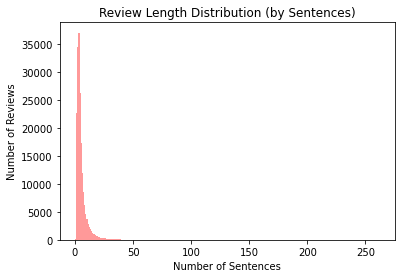

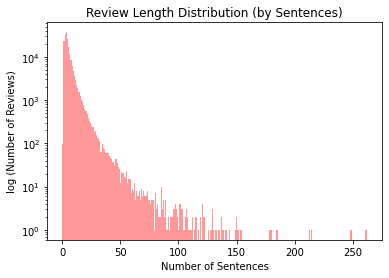

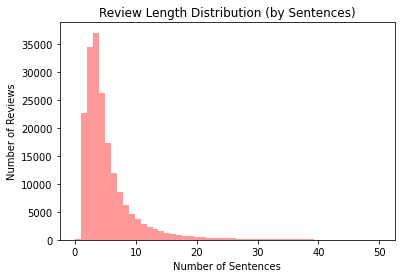

In [34]:
# LINEAR SCALE
s1 = df_numsentences.plot.hist(alpha = 0.4, bins=263, color='r')
s1.set_xlabel('Number of Sentences')
s1.set_ylabel('Number of Reviews')
s1.set_title('Review Length Distribution (by Sentences)')
s1.get_legend().remove()

# LOG SCALE
s2 = df_numsentences.plot.hist(alpha = 0.4, bins=263, log = True, color='r')
s2.set_xlabel('Number of Sentences')
s2.set_ylabel('log (Number of Reviews)')
s2.set_title('Review Length Distribution (by Sentences)')
s2.get_legend().remove()

# LINEAR SCALE
s3 = df_numsentences.plot.hist(range = (0,50), alpha = 0.4, bins=51, color='r')
s3.set_xlabel('Number of Sentences')
s3.set_ylabel('Number of Reviews')
s3.set_title('Review Length Distribution (by Sentences)')
s3.get_legend().remove()

plt.show()

## 3.2.3 Tokenization and Stemming
### Plot 6 (no stemming) NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by TOKENS (x) 

**For each review:   
(1) Tokenize the review (by word)   
(2) Convert tokens to lowercase   
(3) Stem the tokens   
(4) Select only alphabetic whole and stemmed tokens   
(5) Count the number of whole and stemmed tokens**

In [35]:
# Create a 3-column DataFrame: reviewText num_tokens_whole num_tokens_stemmed
# The last two columns are blank

df_review_word = df_all_reviews[['reviewText']]

# to store unique whole tokens
df_review_word.loc[:,'num_tokens_whole'] = ""
df_review_word.loc[:,'num_tokens_whole'] = np.nan

# to store unique stemmed tokens
df_review_word.loc[:,'num_tokens_stemmed'] = ""
df_review_word.loc[:,'num_tokens_stemmed'] = np.nan

/home/ron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/ron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/ron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [36]:
df_review_word.head(2)

,reviewText,num_tokens_whole,num_tokens_stemmed
0,These stickers work like the review says they ...,NaN,NaN
1,These are awesome and make my phone look so st...,NaN,NaN


In [37]:
# For each row in df_review_word:
# 1. Tokenize reviewText
# 2. For each token: store unique whole tokens in token_whole, store unique stemmed tokens in token_stemmed 
# 3. Store unique token counts in df_review_word

for i, row in df_review_word.iterrows():
    tokens_whole = []
    tokens_stemmed = []
         
    tokens = word_tokenize(row['reviewText'])
    tokens1 = [w.lower() for w in tokens]
    tokens2 = [PorterStemmer().stem(w) for w in tokens1]
        
    for t in tokens1:
        if t.isalpha():
            tokens_whole.append(t)
        
    for ts in tokens2:
        if ts.isalpha():
            tokens_stemmed.append(ts)

    df_review_word.loc[i,'num_tokens_whole'] = len(set(tokens_whole)) 
    df_review_word.loc[i,'num_tokens_stemmed'] = len(set(tokens_stemmed))

/home/ron/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
# Create 1-column DataFrames for plots

df_tokens_whole = df_review_word[['num_tokens_whole']]
df_tokens_stemmed = df_review_word[['num_tokens_stemmed']]

In [39]:
# CHECK
df_tokens_whole.head(5)

,num_tokens_whole
0,25.0
1,29.0
2,40.0
3,22.0
4,20.0


In [40]:
# CHECK that num_tokens_stemmed <= num_tokens_whole 
df_tokens_stemmed.head(5)

,num_tokens_stemmed
0,25.0
1,29.0
2,39.0
3,21.0
4,20.0


In [41]:
# SUMMARY STATISTICS

print('SUMMARY STATISTICS FOR LENGTHS OF REVIEWS\n')
print('Max number of whole tokens = ',max(df_tokens_whole['num_tokens_whole']))
print('Min number of whole tokens = ',min(df_tokens_whole['num_tokens_whole']),'\n')

print('Max number of stemmed tokens = ',max(df_tokens_stemmed['num_tokens_stemmed']))
print('Min number of stemmed tokens = ',min(df_tokens_stemmed['num_tokens_stemmed']),'\n')

print('Mean number of whole tokens = ',df_tokens_whole['num_tokens_whole'].mean())
print('Median number of whole tokens = ',df_tokens_whole['num_tokens_whole'].median(),'\n')

print('Mean number of stemmed tokens = ',df_tokens_stemmed['num_tokens_stemmed'].mean())
print('Median number of stemmed tokens = ',df_tokens_stemmed['num_tokens_stemmed'].median())

SUMMARY STATISTICS FOR LENGTHS OF REVIEWS

Max number of whole tokens =  1453.0
Min number of whole tokens =  0.0 

Max number of stemmed tokens =  1224.0
Min number of stemmed tokens =  0.0 

Mean number of whole tokens =  55.64828539851979
Median number of whole tokens =  37.0 

Mean number of stemmed tokens =  53.87468507586987
Median number of stemmed tokens =  36.0


### Plot 6 NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by WHOLE TOKENS (x) 

**Plot the distribution of review lengths (by number of whole tokens):  
(1) Linear scale    
(2) log scale**

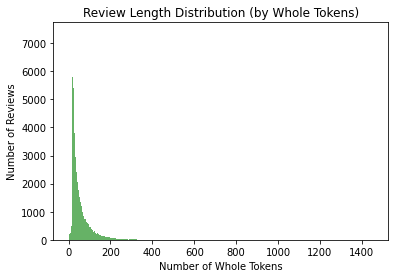

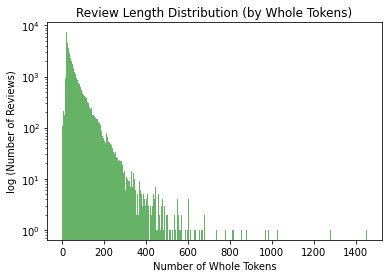

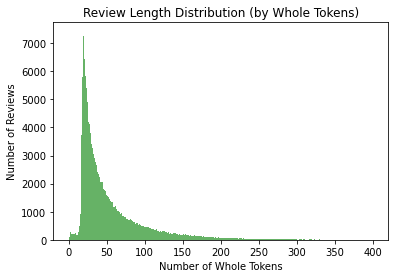

In [42]:
# LINEAR SCALE
wt1 = df_tokens_whole.plot.hist(alpha = 0.6, bins=1454, color='g')
wt1.set_xlabel('Number of Whole Tokens')
wt1.set_ylabel('Number of Reviews')
wt1.set_title('Review Length Distribution (by Whole Tokens)')
wt1.get_legend().remove()

# LOG SCALE
wt2 = df_tokens_whole.plot.hist(alpha = 0.6, bins=1454, log=True, color='g')
wt2.set_xlabel('Number of Whole Tokens')
wt2.set_ylabel('log (Number of Reviews)')
wt2.set_title('Review Length Distribution (by Whole Tokens)')
wt2.get_legend().remove()

# LINEAR SCALE
wt3 = df_tokens_whole.plot.hist(range = (0,400), alpha = 0.6, bins=401, color='g')
wt3.set_xlabel('Number of Whole Tokens')
wt3.set_ylabel('Number of Reviews')
wt3.set_title('Review Length Distribution (by Whole Tokens)')
wt3.get_legend().remove()

plt.show()

### Plot 7 NUMBER OF REVIEWS (y) against LENGTH OF REVIEW by STEMMED TOKENS (x) 

**Plot the distribution of review lengths (by number of stemmed tokens):   
(1) Linear scale    
(2) log scale**

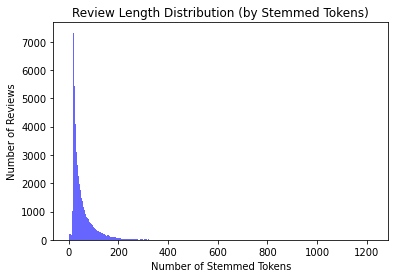

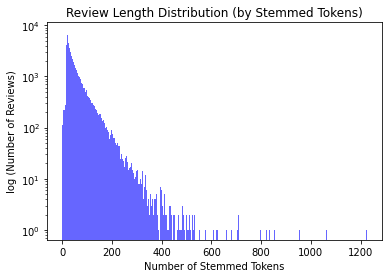

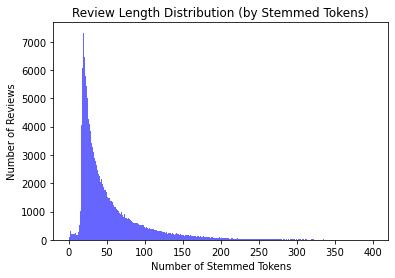

In [43]:
# LINEAR SCALE
st1 = df_tokens_stemmed.plot.hist(alpha = 0.6, bins=1225, color='b')
st1.set_xlabel('Number of Stemmed Tokens')
st1.set_ylabel('Number of Reviews')
st1.set_title('Review Length Distribution (by Stemmed Tokens)')
st1.get_legend().remove()

# LOG SCALE
st2 = df_tokens_stemmed.plot.hist(alpha = 0.6, bins=1225, log=True, color='b')
st2.set_xlabel('Number of Stemmed Tokens')
st2.set_ylabel('log (Number of Reviews)')
st2.set_title('Review Length Distribution (by Stemmed Tokens)')
st2.get_legend().remove()

# LINEAR SCALE
st3 = df_tokens_stemmed.plot.hist(range = (0,400), alpha = 0.6, bins=401, color='b')
st3.set_xlabel('Number of Stemmed Tokens')
st3.set_ylabel('Number of Reviews')
st3.set_title('Review Length Distribution (by Stemmed Tokens)')
st3.get_legend().remove()

plt.show()

## 3.2.4 POS Tagging 
**Select 5 random reviews and apply POS tagging to the first sentence of each review.**

In [44]:
# Select 5 random reviews

random.seed(22)
reviews = random.sample(range(len(df_all_reviews)),5)
print(reviews)

[36796, 63600, 6190, 160717, 117213]


In [45]:
# Get these 5 random reviews

reviews_random = []
for i in reviews:
    reviews_random.append(df_all_reviews.loc[i,'reviewText'])
    print(df_all_reviews.loc[i,'reviewText'],'\n')

This case protects this phone from MANY a fall I've had. I take the case off and you can't even tell the phone is used, still looks like the 4S I got one the first day. 

The real thing..and did data and power.  For the price..go ahead and get it.  Some others have gotten counterfeit.  I think Amazon isn't' screening this stuff well enough. 

great is's gentle on my ipod and the price was a steal and i wouldbuy it again and again 

I usually have to buy multiple stylus pens because with a family of 4, they get lost, broken, and worn down. I like the design of these pens, everyone gets to pick their favorite color. I don't like the long skinny versions or the ones that are too short. These are the perfect size, just slightly smaller than a regular size writing pen. Kind of pricy, but hopefully they should last a while. 

Words can NOT express how powerful this phone is.  I upgraded from a Galaxy Note 1 International and the 2gb of RAM on Note 2 makes a WORLD of difference.  I installed 

In [46]:
# Sentence tokenize these 5 reviews, get the first sentence of each review
# Note that: 1st sentence - good grammar. 2nd, 3rd - poor grammar and punctuation.
# 4th - good grammar. 5th - good grammar except 'cannot' is separated to two words

tokens = []
sentences_random = []

for j, review in enumerate(reviews_random):
    tokens.append(sent_tokenize(review))
    sentences_random.append(tokens[j][0])
    print(sentences_random[j])

This case protects this phone from MANY a fall I've had.
The real thing..and did data and power.
great is's gentle on my ipod and the price was a steal and i wouldbuy it again and again
I usually have to buy multiple stylus pens because with a family of 4, they get lost, broken, and worn down.
Words can NOT express how powerful this phone is.


In [47]:
# Apply POS tagging

tokens = []
for k, sentence in enumerate(sentences_random):
    tokens = word_tokenize(sentence)
    print(nltk.pos_tag(tokens),'\n')

[('This', 'DT'), ('case', 'NN'), ('protects', 'VBZ'), ('this', 'DT'), ('phone', 'NN'), ('from', 'IN'), ('MANY', 'NNP'), ('a', 'DT'), ('fall', 'NN'), ('I', 'PRP'), ("'ve", 'VBP'), ('had', 'VBN'), ('.', '.')] 

[('The', 'DT'), ('real', 'JJ'), ('thing..and', 'NN'), ('did', 'VBD'), ('data', 'NNS'), ('and', 'CC'), ('power', 'NN'), ('.', '.')] 

[('great', 'JJ'), ('is', 'VBZ'), ("'s", 'POS'), ('gentle', 'NN'), ('on', 'IN'), ('my', 'PRP$'), ('ipod', 'NN'), ('and', 'CC'), ('the', 'DT'), ('price', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('steal', 'NN'), ('and', 'CC'), ('i', 'NN'), ('wouldbuy', 'VBP'), ('it', 'PRP'), ('again', 'RB'), ('and', 'CC'), ('again', 'RB')] 

[('I', 'PRP'), ('usually', 'RB'), ('have', 'VBP'), ('to', 'TO'), ('buy', 'VB'), ('multiple', 'JJ'), ('stylus', 'NN'), ('pens', 'NNS'), ('because', 'IN'), ('with', 'IN'), ('a', 'DT'), ('family', 'NN'), ('of', 'IN'), ('4', 'CD'), (',', ','), ('they', 'PRP'), ('get', 'VBP'), ('lost', 'VBN'), (',', ','), ('broken', 'VBN'), (',', ','), ('and